In [ ]:
#### modulos para graficas####
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as pio
##############################

#### modulos para bases de datos###
import numpy as np
import pandas as pd
###################################

#### modulo para generar el html####
from IPython.display import HTML
####################################

### modulo para base numerica de 64 ###
import base64
#######################################

#### modulos para fechas####
from datetime import datetime, timedelta
import time
############################

In [ ]:
#### podemos cargar imagenes desde nuestro drive a Colab
from google.colab import drive

drive.mount('/content/gdrive')
### accedemos al link y le damos permiso###
# una ves drive quede montado en la pestaña de archivos buscamos la imagen que queramos utilizar
# y copiamos su ruta de acceso en este caso usare una imagen de premex

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#### Se abre la imagen, y se lee como arhicvo de imagen y se encode en base 64 
with open("/content/gdrive/MyDrive/premexlogo.jpeg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()
#### se le pasa la imagen encodeada y se le agrega el tipo de imagen en este caso png
encoded_image = "data:image/png;base64," + encoded_string


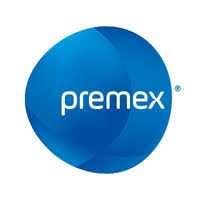

In [ ]:
### creemos una grafica al azar para guardar en un archivo HTML####
### Crear un array de datos
x = np.arange(10)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=x*x, name='Linea',
                         line=dict(color='firebrick', width=4)))
#### agregamos una imagen y agregmos la imagen encodeada
fig.update_layout(title='Grafica Prueba',
                   xaxis_title='X',
                   yaxis_title='Y',
                   images = [
                   dict(
                   source=encoded_image,
                   xref="paper", yref="paper",
                   x=.9, y=1,
                   sizex=0.2, sizey=0.2,
                   xanchor="right", yanchor="bottom"
                  )
                ]
              )
fig.show()

In [ ]:
####  en este caso le damos guardar como tipo de html si cambiamos 'w'
### aca puedes ver los diferentes operadores como "w": https://stackabuse.com/file-handling-in-python/ 
with open('Grafica_Pueba.html', 'w') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))   

""" luego en el caso de collab puedes descaragr el html o usar el
    el codigo que esta abajo que se le pega la ruta de acceso y te muestra el HTMl"""


' luego en el caso de collab puedes descaragr el html o usar el\n    el codigo que esta abajo que se le pega la ruta de acceso y te muestra el HTMl'


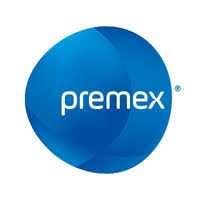

In [ ]:
from IPython.core.display import display, HTML
HTML(filename="/content/Grafica_Pueba.html")

In [ ]:
# para el caso de crear un HTML como con mas presentacion:
def to_html(list_data,company,month):
    
    html_result = '''
<html>
    <head>
        <link rel="shortcut icon" href="http://www.iconj.com/ico/p/1/p14r1u145y.ico" type="image/x-icon" />
        <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
        <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.1/css/bootstrap.min.css">
        <style type="text/css">
            h3 {text-align: left;font-family: Helvetica Neue;}
            h4 {text-align: left;font-family: Helvetica Neue;}
            h5 {text-align: left;font-family: Helvetica Neue; color: gray; }
            h6 {text-align: center;font-family: Helvetica Neue; color: gray; }
            table { margin-left: auto;margin-right: auto;width=20%}
            table, th, td {border: 1px solid black;border-collapse: collapse;}
            th, td {padding: 5px;text-align: center;font-family: Helvetica Neue;font-size: 90%;}
            table tbody tr:hover {background-color: #dddddd;}
            .wide {width: 90%; }
            .text{margin-left: 5%;margin-right: 5%;}
            .container{padding-bottom:3%;}
            .title{text-align: center;font-family: Helvetica Neue;}
            
        </style>
    </head>
    <body style="margin-left:12%;margin-right:12%;margin-top:3%;margin-bottom:3%;padding-left:3%;padding-right:3%;padding-top:3%;
    box-shadow: 0 5px 9px 0 rgba(0, 0, 0, 0.5), 0 6px 20px 0 rgba(0, 0, 0, 0.19);border-radius:10px">
    '''
    ## sub es el subtitulo 
    sub= 'Reporte'+' '+month+ ' 2021'
    #### aca ponemos el logo superior
    html_result += '<img src="https://asimetrixassets.s3.amazonaws.com/logo_asimetrix_resalta.png" alt="asimetrix-full" alt="Asimetrix" width="50%">'
    html_result += '<div class="container">'
    ## titulo con la empresa
    html_result += '<h2 class=title><strong> %s </strong></h2>\n' % company 
    ## subitutlo
    html_result += '<h4 class=title><strong> %s </strong></h4>\n' % sub
    html_result +='<div class="container">'
    html_result +='</div>'
    
    for i in list_data:
    
        if i['title'] != None:
            html_result += '<h3><strong> %s </strong></h3>\n' % i['title']
        if i['subtitle'] != None:
            html_result += '<h4><strong> %s </strong></h4>\n' % i['subtitle']
        if i['text'] != None:
            html_result += '<h5 class="text"> %s </h5>\n' % i['text']
        #para tablas tipo dataframe
        if i['type'] == 'Table':
            html_result += i['values'].to_html(classes='wide', escape=False,index=False)
        #para graficas con plotly
        elif i['type'] == 'Graph':
            aPlot = plot(i['values'], config={"displayModeBar": False}, show_link=False, include_plotlyjs=False, output_type='div')
            html_result += aPlot
        else:
            html_result += '<h3><strong> %s </strong></h3>\n' %'Ningun tipo coincide'
    
        # html_result +='<div class="container">'
        html_result +='</div>'
        
    html_result += '<div style="text-align: left">'
    html_result += '<div style="text-align: center">'
    # aca remplazas el link de la imagen que quieres d elogo inferior
    html_result += '<img src="https://asimetrixassets.s3.amazonaws.com/logo_asimetrix_resalta.png" class="center" style="width:40%">'
    html_result += '<h6 class=title><strong> %s </strong></h4>\n' % 'www.asimetrix.co'
    html_result +='<div class="container">'
    html_result += '''
    </body>
</html>
'''
    return html_result

In [ ]:
# aca creamos las variables que necesitamos
company = "Asimetrix"
month = datetime.now().strftime("%B")
month = str(month)
list_data = list()
### Crear un array de datos
x = np.arange(10)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=x*x, name='Linea',
                         line=dict(color='firebrick', width=4)))
fig.update_layout(title='Grafica Prueba',
                   xaxis_title='X',
                   yaxis_title='Y',
                                 )
fig.show()
## guardamos la figura en la lista
data = {'values':fig,"title":None,'subtitle':None,'text':None,'type':'Graph'}
# agregamos la data de la imagen a la lista
list_data.append(data)

### Crear un array de datos
x = np.arange(10)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=x*x*x, name='Linea',
                         line=dict(color='firebrick', width=4)))
#### agregamos una imagen y agregmos la imagen encodeada
fig.update_layout( xaxis_title='X',
                   yaxis_title='Y',
                                 )
fig.show()
## guardamos la figura en la lista
data = {'values':fig,"title":'Grafica Prueba','subtitle':None,'text':None,'type':'Graph'}
# agregamos la data de la imagen a la lista
list_data.append(data)

# creamos el html con la funcion
html_doc = to_html(list_data,company,month)

with open(company+'.html', 'w') as f:
    f.write(html_doc)
""" luego en el caso de collab puedes descaragr el html o usar el
    el codigo que esta abajo que se le pega la ruta de acceso y te muestra el HTMl"""


' luego en el caso de collab puedes descaragr el html o usar el\n    el codigo que esta abajo que se le pega la ruta de acceso y te muestra el HTMl'

In [ ]:
from IPython.core.display import display, HTML
HTML(filename="/content/Asimetrix.html")